In [99]:
import pandas as pd
import numpy as np

# 1. Data Preparation

In [100]:
# load dataset
data = pd.read_csv('data/Dataset_DeConinck_R.csv', encoding='latin-1')
# Add an ID column
data['ID'] = range(1, len(data) + 1)  # This will create IDs starting from 1

In [101]:
# check format
data.head(10)

,cntry,ans_id,V001,V002,V002bea,V002beb,V002at,V002de,V002es,V002it,...,V058_6,V058_7,V058_8,V058_9,V058_10,V059,Leeftijd3N,Diploma2,Weging,ID
0,4,100,2,62,NaN,NaN,NaN,NaN,7.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3,1,1.400395,1
1,4,233,2,43,NaN,NaN,NaN,NaN,14.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2,2,0.720534,2
2,4,373,2,34,NaN,NaN,NaN,NaN,17.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1,2,0.716512,3
3,4,405,2,53,NaN,NaN,NaN,NaN,14.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2,1,1.374635,4
4,4,462,1,40,NaN,NaN,NaN,NaN,7.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2,2,0.689156,5
5,4,476,1,40,NaN,NaN,NaN,NaN,7.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2,2,0.689156,6
6,4,501,1,40,NaN,NaN,NaN,NaN,7.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2,2,0.689156,7
7,4,546,1,40,NaN,NaN,NaN,NaN,7.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2,2,0.689156,8
8,4,557,1,40,NaN,NaN,NaN,NaN,7.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2,2,0.689156,9
9,4,570,1,40,NaN,NaN,NaN,NaN,7.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2,2,0.689156,10


In [102]:
data.keys()

Index(['cntry', 'ans_id', 'V001', 'V002', 'V002bea', 'V002beb', 'V002at',
       'V002de', 'V002es', 'V002it',
       ...
       'V058_6', 'V058_7', 'V058_8', 'V058_9', 'V058_10', 'V059', 'Leeftijd3N',
       'Diploma2', 'Weging', 'ID'],
      dtype='object', length=636)

## Data cleaning

In [103]:
# filter only data from european countries
# Using loc to filter
europe_df = data.loc[data['cntry'].isin([1,2,3,4,5,6,7])]

In [104]:
# keep only the columns we use for analysis
# 1.1. socidemographic data + V040, V041s)
v009_i = ["V009_" + str(i) for i in range(1, 10)]
v010s = ["V010" + str(country) for country in ["be","at","de","es","it","hu","se"]]
v011s = ["V011" + str(country) for country in ["be","at","de","es","it","hu","se"]]
v041s = ["V041_" + str(i) for i in range(1, 7)]
columns_to_keep = ["ID","cntry"] + ["V" + str(i).zfill(3) for i in range(1,9)] + v009_i + v010s + v011s + ["V012","V013","V020","V021","V022","V040"] + v041s
columns_to_keep
europe_df = europe_df[columns_to_keep]

In [105]:
europe_df.keys()

Index(['ID', 'cntry', 'V001', 'V002', 'V003', 'V004', 'V005', 'V006', 'V007',
       'V008', 'V009_1', 'V009_2', 'V009_3', 'V009_4', 'V009_5', 'V009_6',
       'V009_7', 'V009_8', 'V009_9', 'V010be', 'V010at', 'V010de', 'V010es',
       'V010it', 'V010hu', 'V010se', 'V011be', 'V011at', 'V011de', 'V011es',
       'V011it', 'V011hu', 'V011se', 'V012', 'V013', 'V020', 'V021', 'V022',
       'V040', 'V041_1', 'V041_2', 'V041_3', 'V041_4', 'V041_5', 'V041_6'],
      dtype='object')

In [106]:
# rename column to make them more legible
europe_df = europe_df.rename(columns = {'cntry' : 'Country',
                          'V001' : 'Gender',
                          'V002' : 'Age',
                          'V003' : 'MaritalSt',
                          'V006' : 'Parents',
                          'V007' : 'OneParent',
                          'V008' : 'BothParents',
                        'V009_1' : 'FullTime',
                        'V009_2' : 'PartTime',
                        'V009_3' : 'Disabled',
                        'V009_4' : 'Student',
                        'V009_5' : 'Houseman',
                        'V009_6' : 'Unemployed',
                        'V009_7' : 'Retired',
                        'V009_8' : 'Military',
                        'V009_9' : 'Other',
                          'V012' : 'EndsMeet',
                          'V013' : 'PoliAff',
                          'V020' : 'Religion',
                          'V021' : 'ReligionImp',
                          'V022' : 'ResidenceType',
                          'V040' : 'FeelingThermometer',
                        'V041_1' : 'Anger',
                        'V041_2' : 'Fear',
                        'V041_3' : 'Hope',
                        'V041_4' : 'Sympathy',
                        'V041_5' : 'Disgust',
                        'V041_6' : 'Happiness'})

In [107]:
europe_df.keys()

Index(['ID', 'Country', 'Gender', 'Age', 'MaritalSt', 'V004', 'V005',
       'Parents', 'OneParent', 'BothParents', 'FullTime', 'PartTime',
       'Disabled', 'Student', 'Houseman', 'Unemployed', 'Retired', 'Military',
       'Other', 'V010be', 'V010at', 'V010de', 'V010es', 'V010it', 'V010hu',
       'V010se', 'V011be', 'V011at', 'V011de', 'V011es', 'V011it', 'V011hu',
       'V011se', 'EndsMeet', 'PoliAff', 'Religion', 'ReligionImp',
       'ResidenceType', 'FeelingThermometer', 'Anger', 'Fear', 'Hope',
       'Sympathy', 'Disgust', 'Happiness'],
      dtype='object')

In [108]:
# one hot encoding for nominal variables
# We use pandas get_dummies to perform one-hot encoding
europe_df = pd.get_dummies(europe_df, columns=['Country','Gender','MaritalSt'])
# Convert boolean columns to integers (0 or 1)
# europe_df = europe_df.astype(int)

In [109]:
# should I rename the one hot encoded ones for gender, country, etc.?
# were there only 2 genders reported?
europe_df.keys()

Index(['ID', 'Age', 'V004', 'V005', 'Parents', 'OneParent', 'BothParents',
       'FullTime', 'PartTime', 'Disabled', 'Student', 'Houseman', 'Unemployed',
       'Retired', 'Military', 'Other', 'V010be', 'V010at', 'V010de', 'V010es',
       'V010it', 'V010hu', 'V010se', 'V011be', 'V011at', 'V011de', 'V011es',
       'V011it', 'V011hu', 'V011se', 'EndsMeet', 'PoliAff', 'Religion',
       'ReligionImp', 'ResidenceType', 'FeelingThermometer', 'Anger', 'Fear',
       'Hope', 'Sympathy', 'Disgust', 'Happiness', 'Country_1', 'Country_2',
       'Country_3', 'Country_4', 'Country_5', 'Country_6', 'Country_7',
       'Gender_1', 'Gender_2', 'MaritalSt_1', 'MaritalSt_2', 'MaritalSt_3',
       'MaritalSt_4', 'MaritalSt_5'],
      dtype='object')

## Where were you born?

In [110]:
# where were you born?
# merge columns V004 and V005 into a new column. How? no unique ID
europe_df.V004.value_counts()

V004
1.0    9817
2.0     782
Name: count, dtype: int64

In [111]:
europe_df.V005.value_counts()

V005
99999.0    9817
1.0         422
2.0         357
3.0           3
Name: count, dtype: int64

### Education:
Unify education column across all countries.
5 groups:
1. no schooling
2. primary
3. secondary
4. training and education in a specific trade or profession)
5. higher education
6. don’t know

In [112]:
# unify education column across all countries
# 5 groups 1. no schooling 2. primary 3.secondary 4. training and education in a specific trade or profession) 5. higher education 6. don’t know
#1. no schooling already matches across all country columns
# Belgium:
europe_df.V010be.replace([2,3], 2, inplace=True) #primary
europe_df.V010be.replace([4,5,9,10], 3, inplace=True) #secondary
europe_df.V010be.replace([6,7,8,11], 4, inplace=True) #job training
europe_df.V010be.replace([12,13,14,15,16,17,18], 5, inplace=True) # higher education
europe_df.V010be.replace(19, 6, inplace=True) # dont know

C:\Users\campb\AppData\Local\Temp\ipykernel_41236\1677713630.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  europe_df.V010be.replace([2,3], 2, inplace=True) #primary
C:\Users\campb\AppData\Local\Temp\ipykernel_41236\1677713630.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

In [113]:
europe_df.V010be.value_counts()

V010be
5.0    919
4.0    272
3.0    216
2.0     80
1.0     10
6.0      8
Name: count, dtype: int64

In [114]:
# Austria primary matches
europe_df.V010at.replace([3,4,5,8,10], 3, inplace=True) #secondary
europe_df.V010at.replace([6,7,9,11], 4, inplace=True) #job training
europe_df.V010at.replace([12,13,14,15,16,17,18], 5, inplace=True) # higher education
europe_df.V010at.replace(19, 6, inplace=True) # dont know

C:\Users\campb\AppData\Local\Temp\ipykernel_41236\2697467056.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  europe_df.V010at.replace([3,4,5,8,10], 3, inplace=True) #secondary
C:\Users\campb\AppData\Local\Temp\ipykernel_41236\2697467056.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves a

In [115]:
europe_df.V010at.value_counts()

V010at
4.0    745
3.0    434
5.0    336
2.0      3
6.0      1
1.0      1
Name: count, dtype: int64

In [116]:
# Germany primary matches
europe_df.V010de.replace([3,4,5,6], 3, inplace=True) #secondary
europe_df.V010de.replace(7, 4, inplace=True) #job training
europe_df.V010de.replace([8,9], 5, inplace=True) # higher education
europe_df.V010de.replace(10, 6, inplace=True) # dont know

C:\Users\campb\AppData\Local\Temp\ipykernel_41236\2702176057.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  europe_df.V010de.replace([3,4,5,6], 3, inplace=True) #secondary
C:\Users\campb\AppData\Local\Temp\ipykernel_41236\2702176057.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a

In [117]:
europe_df.V010de.value_counts()

V010de
3.0    553
5.0    506
4.0    455
1.0      4
2.0      2
6.0      1
Name: count, dtype: int64

In [118]:
# Spain:
europe_df.V010es.replace([2,3,4,5,6,7], 2, inplace=True) #primary
europe_df.V010es.replace([8,9,10,11,12], 3, inplace=True) #secondary
europe_df.V010es.replace([13,14,15,16,17,18,19,20,21,22,23,24], 4, inplace=True) #job training
europe_df.V010es.replace([25,26,27], 5, inplace=True) # higher education
europe_df.V010es.replace(28, 6, inplace=True) # dont know

C:\Users\campb\AppData\Local\Temp\ipykernel_41236\2174945959.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  europe_df.V010es.replace([2,3,4,5,6,7], 2, inplace=True) #primary
C:\Users\campb\AppData\Local\Temp\ipykernel_41236\2174945959.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as

In [119]:
europe_df.V010es.value_counts()

V010es
5.0    635
4.0    440
3.0    345
2.0     86
6.0      6
Name: count, dtype: int64

In [120]:
#Italy primary matches
europe_df.V010it.replace([4,6,8,9], 3, inplace=True) #secondary
europe_df.V010it.replace([3,5,7,10,11], 4, inplace=True) #job training
europe_df.V010it.replace([12,13,14,15,16,17,18,19,20,21], 5, inplace=True) # higher education
europe_df.V010it.replace(22, 6, inplace=True) # dont know

C:\Users\campb\AppData\Local\Temp\ipykernel_41236\3920124941.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  europe_df.V010it.replace([4,6,8,9], 3, inplace=True) #secondary
C:\Users\campb\AppData\Local\Temp\ipykernel_41236\3920124941.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a

In [121]:
europe_df.V010it.value_counts()

V010it
4.0    967
5.0    529
2.0      9
1.0      4
6.0      1
Name: count, dtype: int64

In [122]:
# Hungary:
europe_df.V010hu.replace([2,3], 2, inplace=True) #primary
europe_df.V010hu.replace([6,7], 3, inplace=True) #secondary
europe_df.V010hu.replace([4,5,8,9], 4, inplace=True) #job training
europe_df.V010hu.replace([10,11,12,13,14], 5, inplace=True) # higher education
europe_df.V010hu.replace(15, 6, inplace=True) # dont know

C:\Users\campb\AppData\Local\Temp\ipykernel_41236\3581157433.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  europe_df.V010hu.replace([2,3], 2, inplace=True) #primary
C:\Users\campb\AppData\Local\Temp\ipykernel_41236\3581157433.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

In [123]:
europe_df.V010hu.value_counts()

V010hu
5.0    524
4.0    500
3.0    439
2.0     49
6.0      2
Name: count, dtype: int64

In [124]:
# Sweden:
europe_df.V010se.replace([2,3], 2, inplace=True) #primary
europe_df.V010se.replace([5,6,8], 3, inplace=True) #secondary
europe_df.V010se.replace([4,7,10,12], 4, inplace=True) #job training
europe_df.V010se.replace([9,11,13,14,15,16,17,18,19,20], 5, inplace=True) # higher education
europe_df.V010se.replace(21, 6, inplace=True) # dont know

C:\Users\campb\AppData\Local\Temp\ipykernel_41236\3880779314.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  europe_df.V010se.replace([2,3], 2, inplace=True) #primary
C:\Users\campb\AppData\Local\Temp\ipykernel_41236\3880779314.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

In [125]:
europe_df.V010se.value_counts()

V010se
5.0    650
4.0    398
3.0    358
2.0     93
6.0     12
1.0      6
Name: count, dtype: int64

## Income
We are only interested in the income brackets (Values 1 - 10) I am not sure if this is even necessary. They seem to match pretty well. Only Spain is weird because they have one less.

In [126]:
# drop columns we don't need.
europe_df.V011es.value_counts()

V011es
3.0     205
5.0     193
6.0     180
8.0     178
4.0     176
7.0     161
2.0     139
1.0      96
9.0      96
10.0     41
11.0     29
12.0     18
Name: count, dtype: int64

## Sentiment columns
Group into negative and positive feelings towards immigrants

In [127]:
europe_df['NegativeEmo'] = europe_df['Anger'] + europe_df['Fear'] + europe_df['Disgust']
europe_df['PositiveEmo'] = europe_df['Hope'] + europe_df['Sympathy'] + europe_df['Happiness']
# Add a binary column based on the overall sentiment
europe_df['SentimentBinary'] = np.where(europe_df['NegativeEmo'] > europe_df['PositiveEmo'], 0, 1)
# 0 overall negative sentiment
# 1 overall positive sentiment

In [128]:
europe_df.SentimentBinary

0        1
1        1
2        1
3        1
4        1
        ..
10594    0
10595    0
10596    1
10597    0
10598    1
Name: SentimentBinary, Length: 10599, dtype: int32

V041_1 = anger
V041_2 = fear
V041_5 = disgust

V041_3 = hope
V041_4 = sympathy
V041_6 = happiness

Negative_Sentiment = average or sum of (V041_1, V041_2, V041_5)

Positive_Sentiment = average or sum of (V041_3, V041_4, V041_6)

For binary label take whichever sentiment is higher 

We need to pick what vars we care about

Can we keep ordinal vars? Just need to make sure they're following the same tred (ex. "worst" to "best")

One-hot encoding for vars without ranking

## Data cleaning

# 2. Data Exploration

# Analysis

In [140]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns


In [135]:
# scaling age
scaler = StandardScaler()
europe_df[['Age']] = scaler.fit_transform(europe_df[['Age']])

In [136]:
europe_df.head()

,ID,Age,V004,V005,Parents,OneParent,BothParents,FullTime,PartTime,Disabled,...,Gender_1,Gender_2,MaritalSt_1,MaritalSt_2,MaritalSt_3,MaritalSt_4,MaritalSt_5,NegativeEmo,PositiveEmo,SentimentBinary
0,1,1.499224,1.0,99999.0,1.0,99999.0,99999.0,1,0,0,...,False,True,False,False,True,False,False,6,7,1
1,2,-0.189406,1.0,99999.0,1.0,99999.0,99999.0,0,0,0,...,False,True,False,True,False,False,False,3,16,1
2,3,-0.989283,1.0,99999.0,1.0,99999.0,99999.0,1,0,0,...,False,True,False,False,True,False,False,5,13,1
3,4,0.699346,2.0,2.0,3.0,99999.0,2.0,0,0,0,...,False,True,False,False,True,False,False,3,17,1
4,5,-0.456032,1.0,99999.0,1.0,99999.0,99999.0,1,0,0,...,True,False,False,False,True,False,False,3,21,1


In [130]:
europe_df.keys()

Index(['ID', 'Age', 'V004', 'V005', 'Parents', 'OneParent', 'BothParents',
       'FullTime', 'PartTime', 'Disabled', 'Student', 'Houseman', 'Unemployed',
       'Retired', 'Military', 'Other', 'V010be', 'V010at', 'V010de', 'V010es',
       'V010it', 'V010hu', 'V010se', 'V011be', 'V011at', 'V011de', 'V011es',
       'V011it', 'V011hu', 'V011se', 'EndsMeet', 'PoliAff', 'Religion',
       'ReligionImp', 'ResidenceType', 'FeelingThermometer', 'Anger', 'Fear',
       'Hope', 'Sympathy', 'Disgust', 'Happiness', 'Country_1', 'Country_2',
       'Country_3', 'Country_4', 'Country_5', 'Country_6', 'Country_7',
       'Gender_1', 'Gender_2', 'MaritalSt_1', 'MaritalSt_2', 'MaritalSt_3',
       'MaritalSt_4', 'MaritalSt_5', 'NegativeEmo', 'PositiveEmo',
       'SentimentBinary'],
      dtype='object')

## Plots

### Distribution of FeelingThermometer by Employment Status

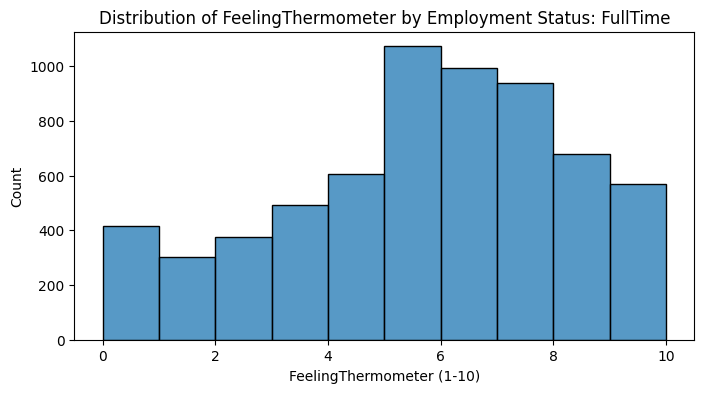

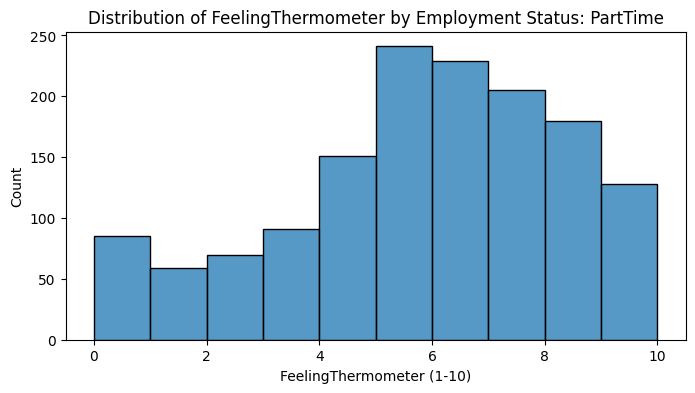

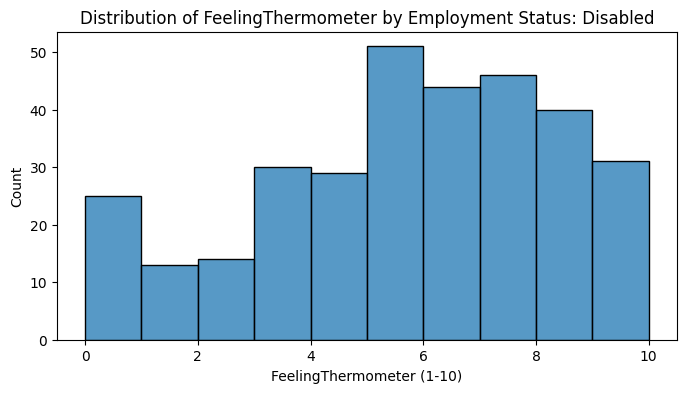

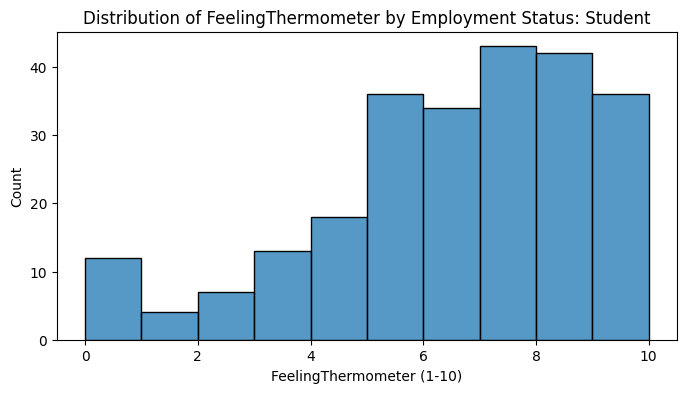

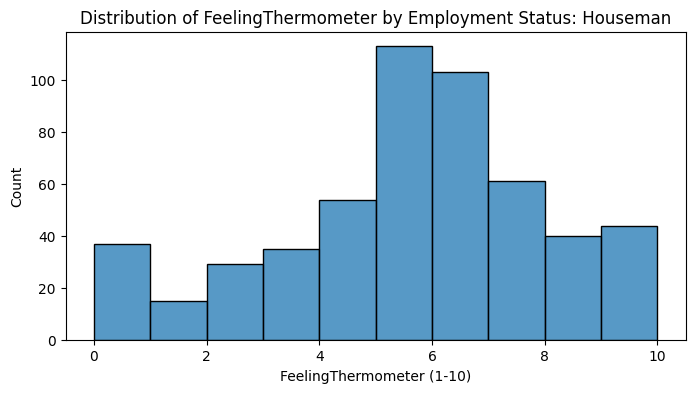

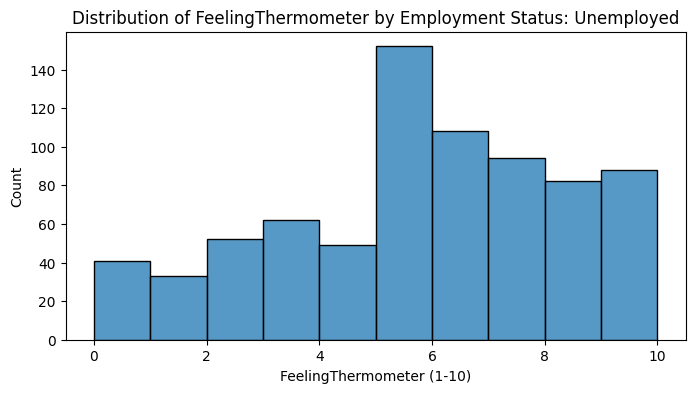

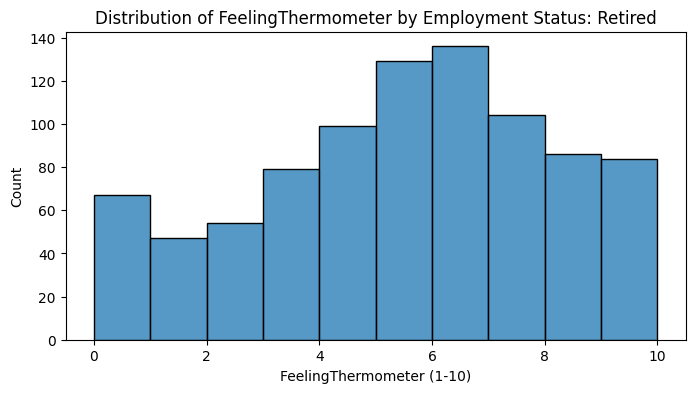

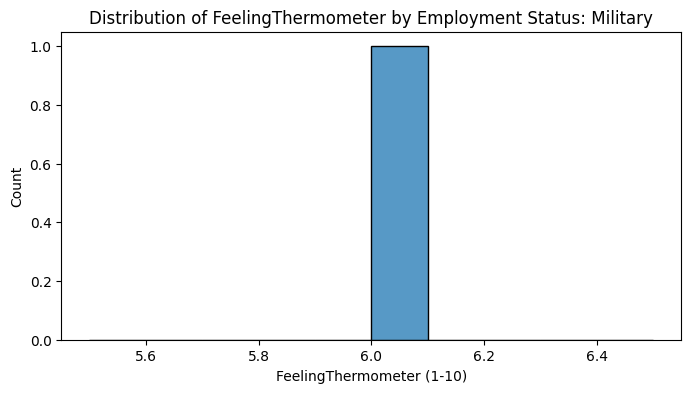

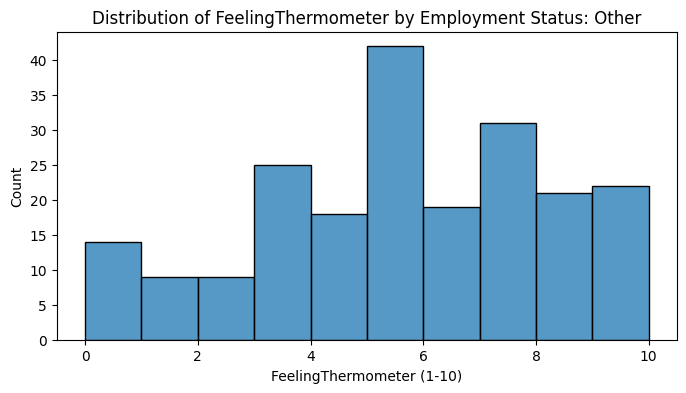

In [143]:
# Distribution of FeelingThermometer across different employment statuses
employment_status_cols = ['FullTime', 'PartTime', 'Disabled', 'Student', 'Houseman', 'Unemployed', 'Retired', 'Military', 'Other']
for col in employment_status_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(data=europe_df[europe_df[col] == 1], x='FeelingThermometer', bins=10)
    plt.title(f"Distribution of FeelingThermometer by Employment Status: {col}")
    plt.xlabel("FeelingThermometer (1-10)")
    plt.ylabel("Count")
    plt.show()

### Gender sentiment comparison

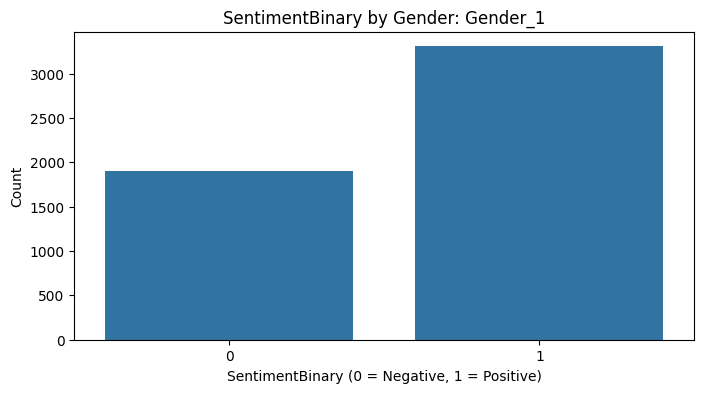

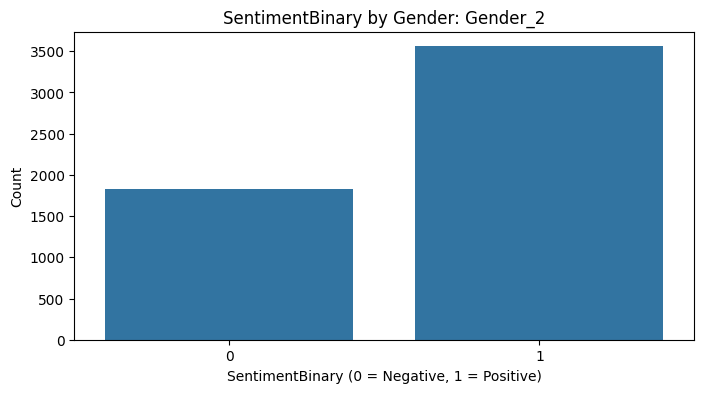

In [148]:
gender_cols = ['Gender_1', 'Gender_2']
for col in gender_cols:
    if europe_df[col].sum() > 0:  # only plot if there are respondents in the group
        plt.figure(figsize=(8, 4))
        sns.countplot(data=europe_df[europe_df[col] == 1], x='SentimentBinary')
        plt.title(f"SentimentBinary by Gender: {col}")
        plt.xlabel("SentimentBinary (0 = Negative, 1 = Positive)")
        plt.ylabel("Count")
        plt.show()

        